# Touten1 regression-RC-R Prediction

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import plotly.express as px # for data visualization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
import warnings
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
%matplotlib inline 

In [ ]:
def loadmodel (df):
    

# Preprocessing

In [2]:
#define dataset

df = pd.read_csv(r'C:\Users\Kaoelg01\Documents\Workload1\design_training\RC\IDT_MASTER_raw.csv')


#Remove duplicates

df.drop_duplicates(keep = False, inplace = True)


#Drop the missing values in the data

df=df.dropna()


In [3]:
df.shape

(2768, 64)

Highest allowed 0.595276820459144
Lowest allowed -0.10318476843602267


count    2577.000000
mean        0.169265
std         0.081841
min         0.073000
25%         0.107200
50%         0.124100
75%         0.227600
max         0.337835
Name: Aprisa_max_total_resistance, dtype: float64

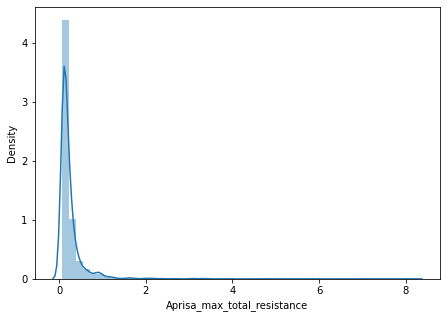

In [4]:
### Removing Outliers ###
### We used here z-score technique ###

# Plot the Distribution plots for the features

warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Aprisa_max_total_resistance'])


# Finding the Boundary Values (1 standard deviation)

high=df['Aprisa_max_total_resistance'].mean() + df['Aprisa_max_total_resistance'].std()
low=df['Aprisa_max_total_resistance'].mean() - df['Aprisa_max_total_resistance'].std()
print("Highest allowed", high)
print("Lowest allowed",low)


# Finding the Outliers and dropping them

df[(df['Aprisa_max_total_resistance'] > high) | (df['Aprisa_max_total_resistance'] < low)]
df.drop(df[(df['Aprisa_max_total_resistance'] > high) | (df['Aprisa_max_total_resistance'] < low)].index, inplace = True)


## Capping on Outliers
# In this technique, we cap our outliers data and make the limit i.e, above a particular value or less than that value, 
#all the values will be considered as outliers, and the number of outliers in the dataset gives that capping number.

upper_limit = df['Aprisa_max_total_resistance'].mean() + 1.5*df['Aprisa_max_total_resistance'].std()
lower_limit = df['Aprisa_max_total_resistance'].mean() - 1.5*df['Aprisa_max_total_resistance'].std()


## Apply the Capping

df['Aprisa_max_total_resistance'] = np.where(
    df['Aprisa_max_total_resistance']>upper_limit,
    upper_limit,
    np.where(
        df['Aprisa_max_total_resistance']<lower_limit,
        lower_limit,
        df['Aprisa_max_total_resistance']
    )
)


# See the statistics using “Describe” Function

df['Aprisa_max_total_resistance'].describe()

In [5]:
# split a dataset into train and test sets
#The train-test split is a technique for evaluating the performance of a machine learning algorithm
#Train Dataset: Used to fit the machine learning model./ Test Dataset: Used to evaluate the fit machine learning model.

X = df.drop(['full_name','net_name','from_pin','to_pin'], axis=1)
y = df['Aprisa_max_total_resistance'] 

# Linear Regression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

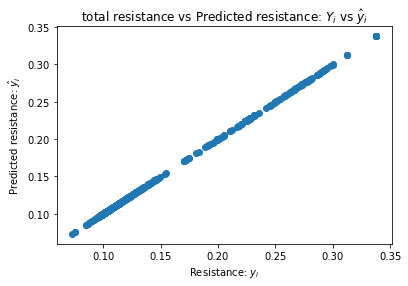

In [8]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)


y_pred_from_sklearn = lm.predict(X_test)

plt.scatter(y_test, y_pred_from_sklearn)
plt.xlabel("Resistance: $y_i$")
plt.ylabel("Predicted resistance: $\hat{y}_i$")
plt.title("total resistance vs Predicted resistance: $Y_i$ vs $\hat{y}_i$")
plt.show()

In [9]:
mae = mean_absolute_error(y_test, y_pred_from_sklearn)
final_mse = mean_squared_error(y_test, y_pred_from_sklearn)
final_rmse = np.sqrt(final_mse)
print('MAE: %.3f' % mae)
print('Finale_MSE: %.3f' % final_mse)
print('Finale_RMSE: %.3f' % final_rmse)

MAE: 0.000
Finale_MSE: 0.000
Finale_RMSE: 0.000


# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

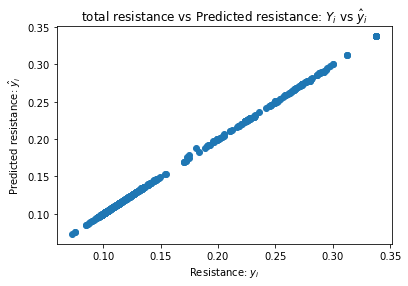

In [11]:
plt.scatter(y_test, predictions)
plt.xlabel("Resistance: $y_i$")
plt.ylabel("Predicted resistance: $\hat{y}_i$")
plt.title("total resistance vs Predicted resistance: $Y_i$ vs $\hat{y}_i$")
plt.show()

In [12]:
mae = mean_absolute_error(y_test, predictions)
final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)
print('MAE: %.3f' % mae)
print('Finale_MSE: %.3f' % final_mse)
print('Finale_RMSE: %.3f' % final_rmse)

MAE: 0.000
Finale_MSE: 0.000
Finale_RMSE: 0.000


# Support Vector Regression

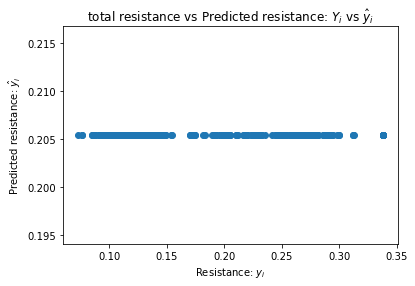

In [14]:
from sklearn.svm import SVR

# generate a model that fit the dataset used for training it
SVR = SVR(C=1000.0, epsilon=0.2)
SVR.fit(X_train, y_train)


# try to predict
y_pred = SVR.predict(X_test)
yhat_train = SVR.predict(X_train)
yhat_test = SVR.predict(X_test)


plt.scatter(y_test, yhat_test)
plt.xlabel("Resistance: $y_i$")
plt.ylabel("Predicted resistance: $\hat{y}_i$")
plt.title("total resistance vs Predicted resistance: $Y_i$ vs $\hat{y}_i$")
plt.show()

In [15]:
mae = mean_absolute_error(y_test, yhat_test)
final_mse = mean_squared_error(y_test, yhat_test)
final_rmse = np.sqrt(final_mse)
print('MAE: %.3f' % mae)
print('Finale_MSE: %.3f' % final_mse)
print('Finale_RMSE: %.3f' % final_rmse)

MAE: 0.081
Finale_MSE: 0.008
Finale_RMSE: 0.088


# Random Forest Regressor

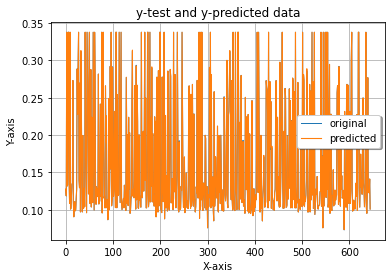

In [16]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor

# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data 
regressor.fit(X_train, y_train)

#Predict Results
ypred = regressor.predict(X_test)

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

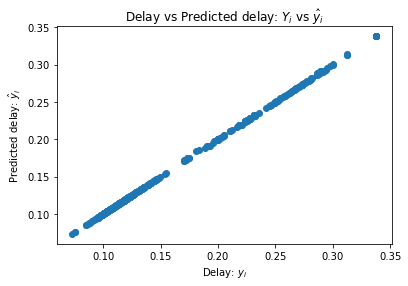

In [17]:
plt.scatter(y_test, ypred)
plt.xlabel("Delay: $y_i$")
plt.ylabel("Predicted delay: $\hat{y}_i$")
plt.title("Delay vs Predicted delay: $Y_i$ vs $\hat{y}_i$")
plt.show()

In [18]:
mae = mean_absolute_error(y_test, yhat_test)
final_mse = mean_squared_error(y_test, yhat_test)
final_rmse = np.sqrt(final_mse)
print('MAE: %.3f' % mae)
print('Finale_MSE: %.3f' % final_mse)
print('Finale_RMSE: %.3f' % final_rmse)

MAE: 0.081
Finale_MSE: 0.008
Finale_RMSE: 0.088


# KNeighbors Regressor

Text(0.5, 1.0, 'ELBOW PLOT')

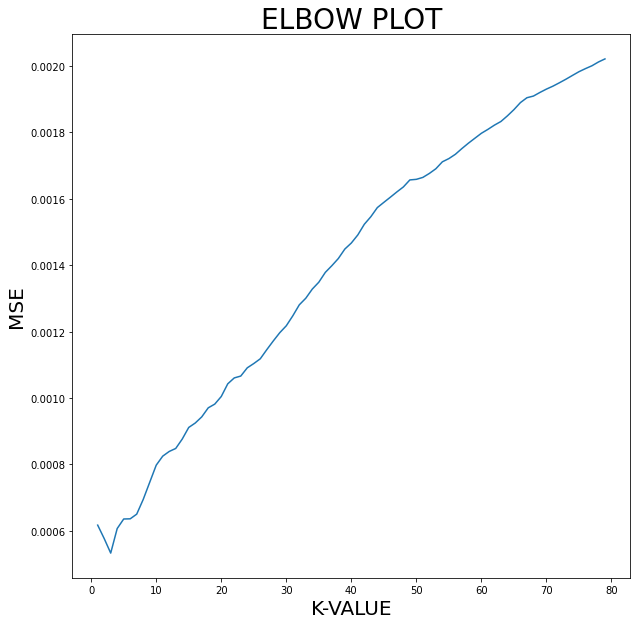

In [19]:
from sklearn.neighbors import KNeighborsRegressor
fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,80,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(X_train,y_train)
    Y_knn_pred=model_knn.predict(X_test)
#Storing MSE 
    mse=mean_squared_error(y_test,Y_knn_pred)
    knn_dict[i]=mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)

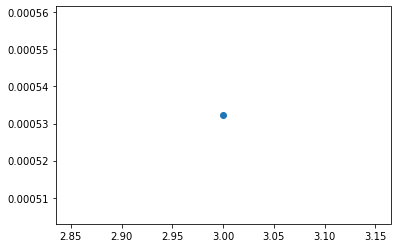

In [20]:
a_list=list(knn_dict.keys())
b_list=list(knn_dict.values())
i = np.argmin(b_list)
x_min = a_list[i]
y_min = b_list[i]
plt.plot(x_min, y_min, marker='o')

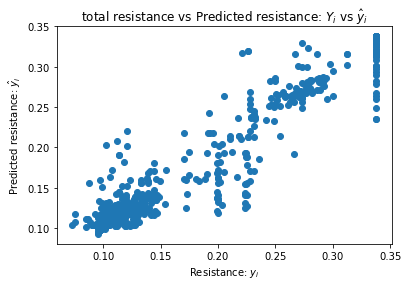

In [21]:
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(X_train, y_train)
Y_knn_pred = knn_model.predict(X_test)
plt.scatter(y_test, Y_knn_pred)
plt.xlabel("Resistance: $y_i$")
plt.ylabel("Predicted resistance: $\hat{y}_i$")
plt.title("total resistance vs Predicted resistance: $Y_i$ vs $\hat{y}_i$")
plt.show()

In [22]:
mae = mean_absolute_error(y_test, yhat_test)
final_mse = mean_squared_error(y_test, yhat_test)
final_rmse = np.sqrt(final_mse)
print('MAE: %.3f' % mae)
print('Finale_MSE: %.3f' % final_mse)
print('Finale_RMSE: %.3f' % final_rmse)

MAE: 0.081
Finale_MSE: 0.008
Finale_RMSE: 0.088
